In [1]:
!pip install torchvision --quiet
!pip install transformers --quiet

!unzip FLAIR_minisample.zip

In [1]:
import os
import torch
from PIL import Image
from transformers import CLIPProcessor, CLIPModel, CLIPTokenizer

In [23]:
def get_model_info(model_ID, device):
	model = CLIPModel.from_pretrained(model_ID).to(device)
	processor = CLIPProcessor.from_pretrained(model_ID)
	tokenizer = CLIPTokenizer.from_pretrained(model_ID)
	return model, processor, tokenizer


def get_single_image_embedding(my_image):
  image = processor(
      text = None,
      images = my_image,
      return_tensors="pt"
  )["pixel_values"].to(device)
  embedding = model.get_image_features(image)
  return embedding


def get_single_text_embedding(text):
  inputs = tokenizer(text, return_tensors = "pt").to(device)
  text_embeddings = model.get_text_features(**inputs)
  return text_embeddings


device = "cuda" if torch.cuda.is_available() else "cpu"
model_ID = "openai/clip-vit-base-patch32"


model, processor, tokenizer = get_model_info(model_ID, device)

# Manuellement avec un mini sample

Display function declaration

In [70]:
def combine_images_side_by_side(images):
   
    # Calculate total width and max height
    total_width = sum(image.width for image in images)
    max_height = max(image.height for image in images)
    
    # Create a new image with the calculated dimensions
    combined_image = Image.new('RGB', (total_width, max_height))
    
    # Paste each image into the combined image
    x_offset = 0
    for image in images:
        combined_image.paste(image, (x_offset, 0))
        x_offset += image.width  # Move the offset to the right
    
    return combined_image

Load images and compute embeddings

In [ ]:
import os
from PIL import Image

folder_path = "FLAIR_minisample/" 
file_list = [folder_path + path for path in os.listdir(folder_path)]
images = [Image.open(f) for f in file_list]
embedded_images = list(map(lambda x: (x, get_single_image_embedding(x)), images))

Sort list from embedding distance

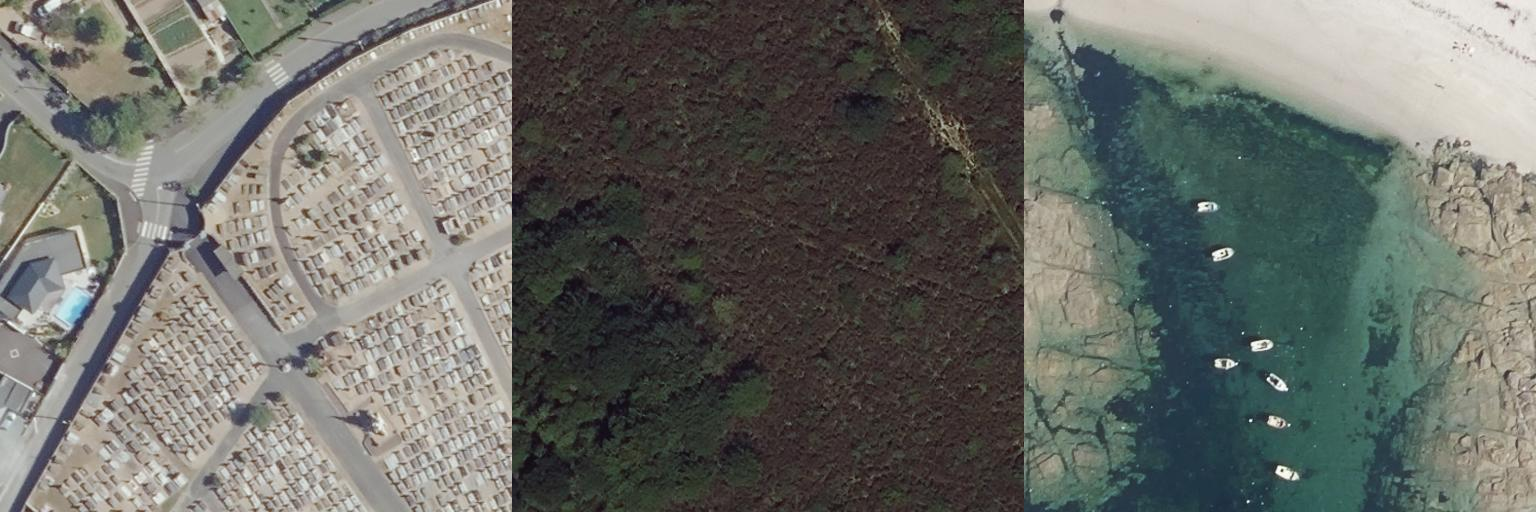

In [69]:
import torch
target = input("What element are we looking for ?")
text_embedding = get_single_text_embedding(f"Aerial view of {target}")

def dist_function(embedded_image):
    return torch.cdist(text_embedding, embedded_image[1])

embedded_images.sort(key=dist_function)

top_three_matches = [embedded_image[0] for embedded_image in embedded_images[:3]]
combine_images_side_by_side(top_three_matches)